# Assignment 2: Degree Distributions and Network Topology

In [1]:
import collections
import networkx as nx
import matplotlib.pyplot as plt
import numpy as np
import scipy.stats
from typing import Callable, List, Tuple, Dict
from scipy.stats import pearsonr

from powerlaw import *

In [2]:
import zipfile as zf
files = zf.ZipFile("powerlaw.zip", 'r')
files.extractall('directory to extract')
files.close()

# parse the "blog.txt" into graph
G = nx.read_edgelist("blog.txt", create_using=nx.DiGraph)
# Create an undirected version
G_undirected = G.to_undirected()


In [3]:
!pip install powerlaw 
import powerlaw

## Part 1  -  Assortativity and The Friendship Paradox

### 1.1

In [4]:
# Compute the Pearson correlation coefficieient for
# the degrees of adjacent nodes.
# use a one sample t-test to evaluate whether your
# answer is statistically significant.


def calculate_pvalue_and_pearson(G: nx.Graph) -> (float, float, str):
    """
    Inputs:
        G: NetworkX graph object

    Returns:
        p_value (float): p-value of one sample t-test of the correlation coefficient
        r (float):  the Pearson correlation coefficieient for the degrees of adjacent nodes
        network_type[*0-2*]: return one string coresponding to the network type. It has to be "assortative", "disassortative", or "neutral."
    """
    
   
    degrees = nx.degree(G)
    x = [degrees[u] for u, v in G.edges()]
    y = [degrees[v] for u, v in G.edges()]
    r,p_value = pearsonr(x,y)
    alpha = 0.05
    if p_value <= alpha:
        if r > 0:
            network_type = "assortative"
        elif r < 0:
            network_type = "disassortative"
    else:
        network_type = "neutral"
    
    return p_value, r, network_type

In [5]:
# Do not modify
p_value, r , network_type= calculate_pvalue_and_pearson(G_undirected)
print(">>Part 1.1 result<<")
print(p_value, r, network_type)

>>Part 1.1 result<<
1.0266706526771476e-08 -0.04426889161551043 disassortative


### 1.2 

In [6]:
def get_average_neighbor_degrees(G: nx.Graph) -> (List, List):
    """
    Given graph G, this function calculates the average node degrees for nodes with degree k.

    Inputs:
        G: NetworkX graph object

    Returns:
        k: a sequence representing the unique node degrees of nodes in G
        knn: a sequence representing the corresponding average neighbor degrees for each degree 
             in `k`. In other words, knn[i] is the average neighbor degree for nodes with degree k[i].
    """

    avg_degree_k = nx.average_degree_connectivity(G) 
    k= list(avg_degree_k.keys()) 
    knn = list(avg_degree_k.values())
    
    
    return k, knn

In [7]:
def plot_average_neighbor_degree(k: List, knn: List):
    """
    Inputs:
        k: dictionary keys
        knn: dictionary values
    
    Returns:
        Nothing, but draws the visualizations of the graphs.
    """
    
    # This line is a placeholder
    
    plt.scatter(k, knn, c="orange") 
    plt.xscale('log')
    plt.yscale('log') 
    plt.xlabel("Node degree (k)") 
    plt.ylabel("Average Neighbor Degree (knn)") 
    plt.title("Scatterplot of the Average Neighbor Degree \n of all k-degree Nodes")
    plt.show()
    

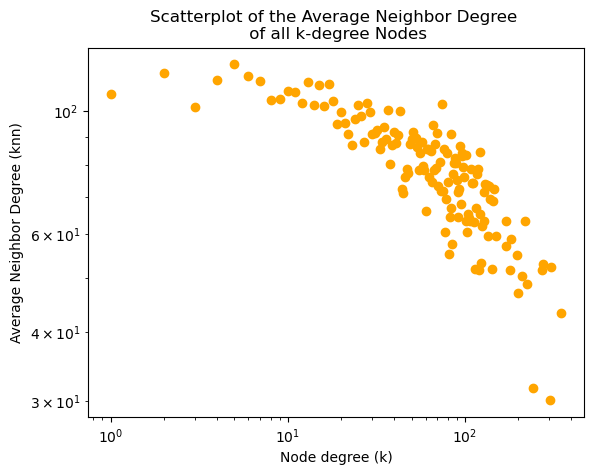

In [8]:
# Do not modify
k, knn  = get_average_neighbor_degrees(G_undirected)
plot_average_neighbor_degree(k, knn)

In [9]:
def average_neighbor_degree_test(k: List, knn: List) -> (float, float, str):
    """
    Inputs:
        k: dictionary keys
        knn: dictionary values
    
    Returns:
        p_value (float): p-value of one sample t-test of the correlation coefficient
        r (float):  the Pearson correlation coefficieient 
        network_type[*0-2*]: return one string coresponding to the network type

    """
    
    k = np.array(k)
    knn = np.array(knn)
    r, p_value = pearsonr(k, knn)
    
    alpha = 0.05
    if p_value <= alpha:
        if r > 0:
            network_type = "assortative"
        elif r < 0:
            network_type = "disassortative"
    else:
        network_type = "neutral"
     
    
    return p_value, r, network_type

    

In [10]:
# Do not modify
print(">>Part 1.2 result<<")
average_neighbor_degree_test(k , knn)

>>Part 1.2 result<<


(3.803193641675526e-38, -0.8319287959674051, 'disassortative')

Provide an explaination for how you determined the network type

The correlation coefficient (r) is negative which indicates that high-degree nodes tend to 
connect to low-degree neighbors, and it is the characteristic of a disassortative network.

## Part 2 - Power-Law Distributions

### 2.1

In [11]:
# Plot the out-degree distribution
def out_degrees(G: nx.Graph) -> List:
    """
    Inputs:
        G: NetworkX graph object
    
    Returns:
        out_degrees: a list of out degrees
    """
    
    out_degrees = []
    out_degrees=[d for _, d in G.out_degree()]

    return out_degrees

def in_degrees(G: nx.Graph) -> List:
    """
    Inputs:
        G: NetworkX graph object
    
    Returns:
        in_degrees: a list of in degrees
    """
    
    in_degrees = []
    in_degrees=[d for _, d in G.in_degree()]
    
    return in_degrees

In [12]:
import powerlaw
from scipy.stats import linregress
def plot_degrees(degrees: List):
    """
    Inputs:
        Degrees: list of degrees
    
    Returns:
        Nothing, but draws the visualizations of the graphs.
    """
    
    degrees_nz = [degree for degree in degrees if degree > 0]
    
    fig, axs = plt.subplots(2, 2, constrained_layout=True) 
    
    hist, bin_edges = np.histogram(degrees, bins=20, density=True)
    bin_centers = (bin_edges[:-1] + bin_edges[1:]) / 2
    axs[0, 0].scatter(bin_centers, hist)
    axs[0, 0].set_title('Linear Scale')
    axs[0, 0].set_xlabel('k')
    axs[0, 0].set_ylabel('p_k')
    
    hist, bin_edges = np.histogram(degrees_nz, bins=20, density=True)
    bin_centers = (bin_edges[:-1] + bin_edges[1:]) / 2
    axs[0, 1].scatter(bin_centers, hist)
    axs[0, 1].set_xscale('log')
    axs[0, 1].set_yscale('log')
    axs[0, 1].set_title('Linear Binning')
    axs[0, 1].set_xlabel('k')
    axs[0, 1].set_ylabel('p_k')
    
    max_degree = max(degrees)
    log_bins = np.logspace(np.log10(1), np.log10(max_degree), 20)
    hist, bin_edges = np.histogram(degrees_nz, bins=log_bins, density=True)
    bin_centers = (bin_edges[:-1] + bin_edges[1:]) / 2
    axs[1, 0].scatter(bin_centers, hist)
    axs[1, 0].set_xscale('log')
    axs[1, 0].set_yscale('log')
    axs[1, 0].set_title('Log-Binning')
    axs[1, 0].set_xlabel('k')
    axs[1, 0].set_ylabel('p_k')
    
    fit = powerlaw.Fit(degrees_nz, discrete=True)
    fit.plot_ccdf(ax=axs[1, 1], linewidth=2)
    axs[1, 1].set_xscale('log')
    axs[1, 1].set_yscale('log')
    axs[1, 1].set_title('Cumulative')
    axs[1, 1].set_xlabel('k')
    axs[1, 1].set_ylabel('P_k')
    axs[1, 1].legend()
    
    plt.tight_layout()
    plt.show()
    

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


>>Part 2.1 out-degree plot<<
Calculating best minimal value for power law fit


C:\Users\zhaoj\AppData\Local\Temp\ipykernel_11560\2260497701.py:52: UserWarning: The figure layout has changed to tight
  plt.tight_layout()


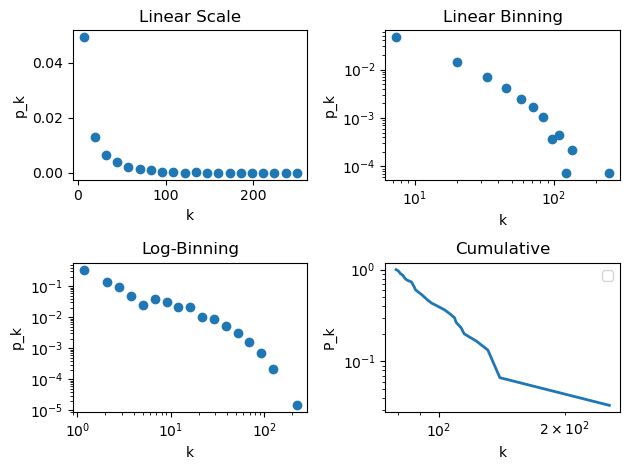

In [13]:
# Plot the out-degree distribution
# Do not modify
print(">>Part 2.1 out-degree plot<<")
l_out_degrees = out_degrees(G)
plot_degrees(l_out_degrees)

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


>>Part 2.1 in-degree plot<<
Calculating best minimal value for power law fit


C:\Users\zhaoj\AppData\Local\Temp\ipykernel_11560\2260497701.py:52: UserWarning: The figure layout has changed to tight
  plt.tight_layout()


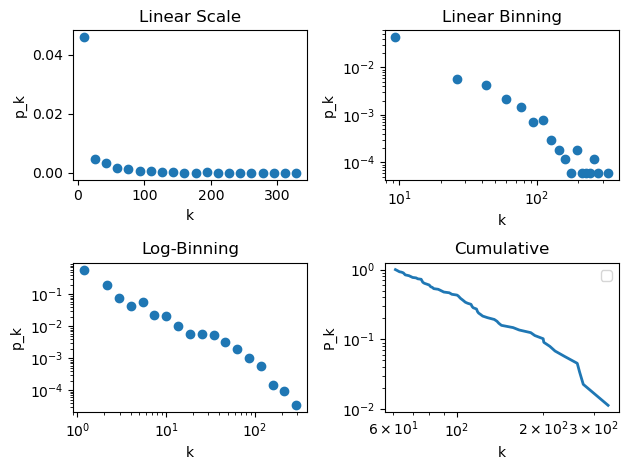

In [14]:
# Plot the in-degree distribution
# Do not modify
print(">>Part 2.1 in-degree plot<<")
l_in_degrees = in_degrees(G)
plot_degrees(l_in_degrees)

In [15]:
#fit the out-degree distributon without xmax
def fit_outdegrees_without_xmax(out_degrees: List) -> (float, float):
    """
    Inputs:
        out_degrees: list of out degrees
    
    Returns:
        alpha (float): alpha value from the fit function
        xmin (float): xmin from the fit function
    """

    out_degrees_nz = [degree for degree in out_degrees if degree > 0]
    fit = powerlaw.Fit(out_degrees_nz, dicrete= True) 
    alpha=fit.power_law.alpha
    xmin = fit.xmin
     
    return alpha, xmin

In [16]:
#fit the out-degree distributon with xmax = 200
def fit_outdegrees_with_xmax(out_degrees: List) -> (float, float):
    """
    Inputs:
        out_degrees: list of out degrees
    
    Returns:
        alpha (float): alpha value from the fit function
        xmin (float): xmin from the fit function
    """
    
    out_degrees_nz = [degree for degree in out_degrees if degree > 0]
    fit = powerlaw.Fit(out_degrees_nz, xmax=200, dicrete= True) 
    alpha = fit.power_law.alpha
    xmin=fit.xmin
    return alpha, xmin

In [17]:
# Fit the in-degree distributon without xmax
def fit_indegrees_without_xmax(in_degrees: List) -> (float, float):
    """
    Inputs:
        in_degrees: list of in degrees
    
    Returns:
        alpha (float): alpha value from the fit function
        xmin (float): xmin from the fit function
    """
    
    in_degrees_nz = [degree for degree in in_degrees if degree > 0]
    fit = powerlaw.Fit(in_degrees_nz,dicrete= True)  
    alpha = fit.power_law.alpha
    xmin = fit.xmin
    return alpha, xmin

In [18]:
# Fit the in-degree distributon with xmax = 300
def fit_indegrees_with_xmax(in_degrees: List) -> (float, float):
    """
    Inputs:
        in_degrees: list of in degrees
    
    Returns:
        alpha (float): alpha value from the fit function
        xmin (float): xmin from the fit function
    
    """
    in_degrees_nz = [degree for degree in in_degrees if degree > 0]
    fit = powerlaw.Fit(in_degrees_nz, xmax=300, dicrete= True) 
    alpha = fit.power_law.alpha
    xmin = fit.xmin
    
    return alpha, xmin

In [19]:
# Do not modify
a1, x1 = fit_outdegrees_without_xmax(l_out_degrees)
a2, x2 = fit_outdegrees_with_xmax(l_out_degrees)
a3, x3 = fit_indegrees_without_xmax(l_in_degrees)
a4, x4 = fit_indegrees_with_xmax(l_in_degrees)

print(">>Part 2.2 results<<")
print("Out degrees no xmax", "alpha: " + str(a1), "xmin: " + str(x1))
print("Out degrees with xmax", "alpha: " + str(a2), "xmin: " + str(x2))
print("In degrees no xmax", "alpha: " + str(a3), "xmin: " + str(x3))
print("In degrees with xmax", "alpha: " + str(a4), "xmin: " + str(x4))

Calculating best minimal value for power law fit
Calculating best minimal value for power law fit
Calculating best minimal value for power law fit
Calculating best minimal value for power law fit
>>Part 2.2 results<<
Out degrees no xmax alpha: 5.406437849377284 xmin: 79.0
Out degrees with xmax alpha: 6.148699049098679 xmin: 79.0
In degrees no xmax alpha: 3.111233294545771 xmin: 61.0
In degrees with xmax alpha: 3.121723275961421 xmin: 59.0


## Part 3 - The Small-World Property

### Clustering Coefficient and Transitivity 
### 3.1

In [20]:
# Find the largest strongly connected component of the directed network
def largest_SCC(G: nx.Graph) -> nx.Graph:
    """
    Inputs:
        G: NetworkX graph object
    
    Returns:
        G_0: NetworkX graph object, the LCC undirected 
    
    """    
    
    largest_scc = max(nx.strongly_connected_components(G), key=len)
    G_0 = G.subgraph(largest_scc).to_undirected()
    
    return G_0


### 3.2

In [21]:
def create_random_network(G: nx.Graph) -> (nx.Graph, int, int):
    """
    Inputs:
        G: NetworkX graph object

    Returns:
        R:  A random NetworkX graph object
        n:  n of the G(n,p)
        p:  p of the G(n,p)

    """
    
    n = G.number_of_nodes()
    m = G.number_of_edges()
    p = m / (n * (n - 1))  
    
    R = nx.gnp_random_graph(n, p, directed=True)
    
    return R, n, p


# Plot the clustering coefficient of the LCC and a G(n,p) network in CCDF format
def get_ccdf(values: List) -> (Tuple, List):
    """
    Inputs:
        values: clustering coefficient values

    Returns:
        unique_value: tuple
        ccdf: array or list

    """
    # This is a placeholder
    unique_value = ()
    ccdf = []
    values = sorted(values)
    unique_values = tuple(values)
    
    ccdf = [1.0 - i / len(values) for i in range(len(values))]
        
    return unique_values, ccdf
    
def get_clustering_coefficients(G: nx.Graph, R: nx.Graph) -> (Dict, Dict):
    """
    Compute the clustering coefficients for graphs G and R.
    The results are put into two dicts: `clustering_coefficient` and `clustering_coefficient_r`.

    Inputs:
        G: NetworkX graph object
        R: A random NetworkX graph object

    Returns:
        clustering_coefficient: dict - holds the clustering coefficients for graph G. The keys 
                                       are the nodes and the values are the corresponding clustering 
                                       coefficients.
        clustering_coefficient_r: dict - holds the clustering coefficients for random graph R.

    """
    clustering_coefficient = {}
    clustering_coefficient_r = {}
    clustering_coefficient = nx.clustering(G)
    clustering_coefficient_r = nx.clustering(R)
    return clustering_coefficient, clustering_coefficient_r


def plot_ccdf(G: nx.Graph,
              get_ccdf: Callable, # function get_ccdf
              clustering_coefficient: Dict,
              clustering_coefficient_r: Dict):
    """
    Inputs:
        G: NetworkX graph object
        get_ccdf: ccdf function previously implemented
        clustering_coefficient: dict
        clustering_coefficient_r:dict of random

    Returns:
        Nothing, but draws the visualizations of the graphs.

    """
    
    clustering_values = list(clustering_coefficient.values())
    clustering_values_r = list(clustering_coefficient_r.values())

    unique_values, ccdf = get_ccdf(clustering_values)
    unique_values_r, ccdf_r = get_ccdf(clustering_values_r)
    
    plt.figure(figsize=(10, 6))
    
    plt.plot(unique_values, ccdf, label='Empirical Network', marker='o', linestyle='-')
    plt.plot(unique_values_r, ccdf_r, label='Random Network', marker='o', linestyle='-')
    plt.title('CCDF of Clustering Coefficients')
    plt.xlabel('Clustering Coefficient')
    plt.ylabel('CCDF')
    plt.legend()
    plt.grid(True)
    plt.show()

>>Part 3.1 and 3.2 results<<


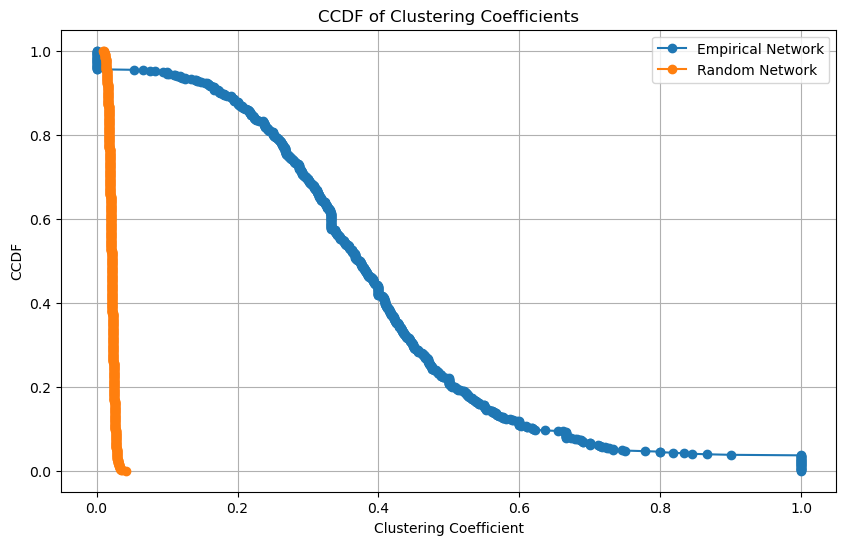

In [22]:
# Do not modify
print(">>Part 3.1 and 3.2 results<<")
G_0 = largest_SCC(G)
R, n, p = create_random_network(G_0)
clustering_coefficient, clustering_coefficient_r = get_clustering_coefficients(G_0, R)
plot_ccdf(G_0, get_ccdf, clustering_coefficient, clustering_coefficient_r)


### 3.3

In [23]:
def KS_test(clustering_coefficient: Dict,
            clustering_coefficient_r: Dict) -> (scipy.stats.kstest):
    """
    Inputs:
        clustering_coefficient: dict
        clustering_coefficient_r:dict of random
    
    Returns:
        ks: KstestResults object
    
    """
    values = list(clustering_coefficient.values())
    values_r = list(clustering_coefficient_r.values())
    ks = scipy.stats.kstest(values, values_r)
    
  
    return ks



In [24]:
# do not modify
print(">>Part 3.3 results<<")
KS_test(clustering_coefficient, clustering_coefficient_r)

>>Part 3.3 results<<


KstestResult(statistic=0.9546027742749055, pvalue=0.0, statistic_location=0.04112554112554113, statistic_sign=-1)

Based on the high KS statistic 0.9546 and p-value of 0.0, there is a significant difference between the two distributions of clustering coefficients. 

### 3.4

In [25]:
# Plot the average clustering coefficient as a function of the node degree
def average_metric_on_degree(G: nx.Graph, metric: Dict) -> Dict:
    """
    Given a graph G and a dict `metric` that contains some metric value by node, compute the
    average metric value by node degree.
    
    Inputs:
        G: NetworkX graph object
        metric: A `metric` dict, where the keys are the nodes and the values are the metric values of the nodes. 
                An example of the metric is the cluster coefficient.
        
    Returns:
        k_coef: dict - the keys are the node degrees and the values are the corresponding average metric values
    
    """
    degree_metric = {}
    for node in G.nodes():
        degree = G.degree(node)
        if degree not in degree_metric:
            degree_metric[degree] = []
        degree_metric[degree].append(metric[node])
    
        k_coef = {k: np.mean(v) for k, v in degree_metric.items()}
    return k_coef

def plot_average_clustering_coefficient(G_0: nx.Graph,
                                        average_metric_on_degree: Callable,
                                        R: nx.Graph):
    """
    Inputs:
        G: NetworkX graph object
        average_metric_on_degree: function you implemented
        R: Random NetworkX graph object
    
    Returns:
        Nothing, but draws the visualizations of the graphs. 
    
    """
    clustering_coefficient_G_0 = nx.clustering(G_0)
    clustering_coefficient_R = nx.clustering(R)
    
    
    avg_clustering_by_degree_G_0 = average_metric_on_degree(G_0, clustering_coefficient_G_0)
    avg_clustering_by_degree_R = average_metric_on_degree(R, clustering_coefficient_R)
    
    degrees_G_0 = list(avg_clustering_by_degree_G_0.keys())
    avg_clustering_G_0 = list(avg_clustering_by_degree_G_0.values())
    
    degrees_R = list(avg_clustering_by_degree_R.keys())
    avg_clustering_R = list(avg_clustering_by_degree_R.values())
    
    plt.figure(figsize=(10, 6))
    plt.plot(degrees_G_0, avg_clustering_G_0, 'o-', label='Empirical Network (G_0)')
    plt.plot(degrees_R, avg_clustering_R, 'x-', label='Random Network (R)')
    plt.xscale('log')
    plt.yscale('log')
    plt.xlabel('Node Degree')
    plt.ylabel('Average Clustering Coefficient')
    plt.title('Average Clustering Coefficient vs Node Degree')
    plt.legend()
    plt.grid(True, which="both", ls="--")
    plt.show()

>>Part 3.4 results<<


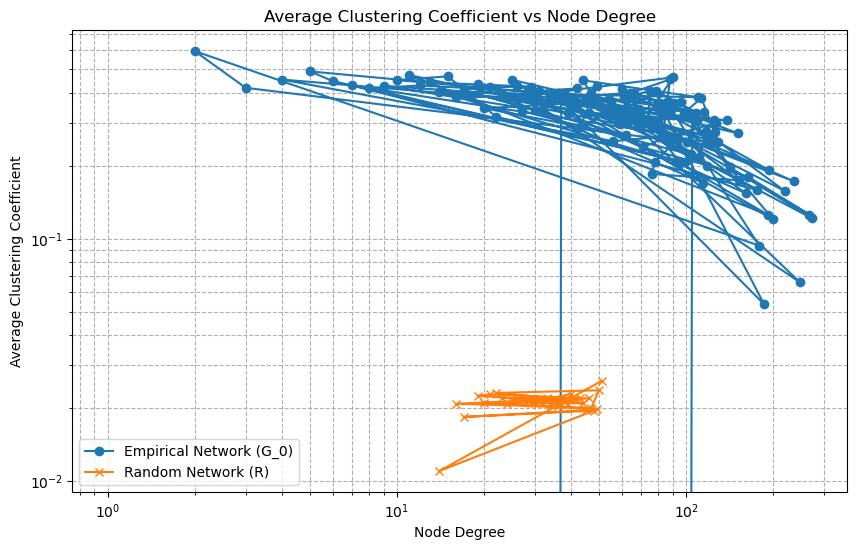

In [26]:
# Do not modify
print(">>Part 3.4 results<<")
plot_average_clustering_coefficient(G_0, average_metric_on_degree, R)

The G_0 has significantly higher clustering coefficients comparing with the random network R, and R is lack of strong local clustering. The G_0's clustering coefficient decreases with increased node degree which indicates a hierachical structure, while the R's clustering coefficient is unchanged with node degree. 

### 3.5

In [27]:
# Plot the transitivity coefficient of the overall network of the LCC and the 100 G(n,p) networks
def get_transitivities_and_random_graphs(n: int, p: int, N: int) -> (List, List):
    """
    Inputs:
        n:  n of the G(n,p)
        p:  p of the G(n,p)
        N:  number of random graphs to generate
    
    Returns:
        transitivities: list of transitivities corresponding to the random graphs in R_graphs
        R_graphs: list of random graphs
    
    """
    transitivities = []
    R_graphs = []
    
    for i in range(N):
        
        R = nx.gnp_random_graph(n, p, directed=True)
        transitivity = nx.transitivity(R)
        transitivities.append(transitivity)
        R_graphs.append(R)
    return transitivities, R_graphs


In [28]:
import seaborn as sns
def plot_transitivity_coefficients(G: nx.Graph, transitivities: List):
    """
    Inputs:
        G: NetworkX graph object
        transitivities: list of transitivities
    
    Returns:
        Nothing, but draws the visualizations of the graphs.
    
    """
    
    plt.figure(figsize=(10, 6))
    plt.boxplot(transitivities, positions=[0], widths=0.6)
    
    transitivity_G = nx.transitivity(G)
    plt.scatter(0, transitivity_G, color='red', label='Empirical G')
    
    plt.ylabel('Transitivity Coefficient')
    plt.title('Transitivity Coefficient Distribution')
    plt.legend()
    plt.show()
    

>>Part 3.5 results<<


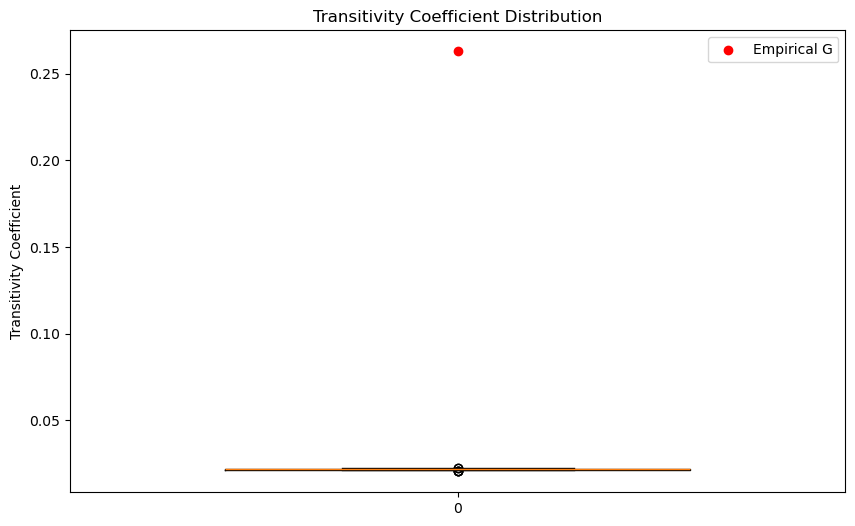

In [29]:
# do not modify

print(">>Part 3.5 results<<")
R, n, p = create_random_network(G_0)
transitivities, R_graphs = get_transitivities_and_random_graphs(n, p, 100)
plot_transitivity_coefficients(G_0, transitivities)

### CPL/ASPL and Diameter
### 3.6 

In [30]:
def get_diameters_and_aspls(R_graphs: List) -> (List, List):
    """
    Inputs:
        R_graphs: list of random graphs
    
    Returns:
        diameters: list of corresponding diameters
        aspls: list of coresponding aspls
    
    """
    
    diameters = []
    aspls = []
    
    for r in R_graphs:
       
        diameters.append(nx.diameter(r))
        aspl = nx.average_shortest_path_length(r)
        aspls.append(aspl)
    
    return diameters, aspls



In [31]:
def plot_diameters(G: nx.Graph, diameters: List):
    """
    Inputs:
        G: NetworkX graph object
        diameters: list of diameters
    
    Returns:
        Nothing, but draws the visualizations of the graphs.
    
    """
    
    plt.figure(figsize=(10, 6))
    plt.boxplot(diameters)
    
    diameter_G = nx.diameter(G)
    plt.scatter(diameter_G, 1, color='red', zorder=5)
    
    plt.ylabel('Diameter')
    plt.title('Diameter Distribution')
    plt.legend()
    plt.show()


In [32]:
# Plot the average shortest path length of the LCC
# and the 100 G(n,p) networks
def plot_aspls(G: nx.Graph, aspls: List):
    """
    Inputs:
        G: NetworkX graph object
        aspls: list of aspls
    
    Returns:
        Nothing, but draws the visualizations of the graphs.
    
    """

    trans_G = nx.transitivity(G) 
    import random 
    random.seed(1) 
    
    seed_list = random.sample(range(1, 1000), 100) 
    G_100 = [] 
    for k in seed_list: 
        gnp = nx.gnp_random_graph(n, p, seed=k, directed=False) 
        G_100.append(gnp) 
    trans_G100 = [] 
    for g in G_100: 
        trans = nx.transitivity(g) 
        trans_G100.append(trans) 
    print("Transitivity Coefficient of G0: ", trans_G) 
    plt.boxplot(trans_G100) 
    plt.title("Box and Whiskers Plot of the Transitivity Coefficients\n of the Random Networks") 
    plt.show()



>>Part 3.6 results<<


No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


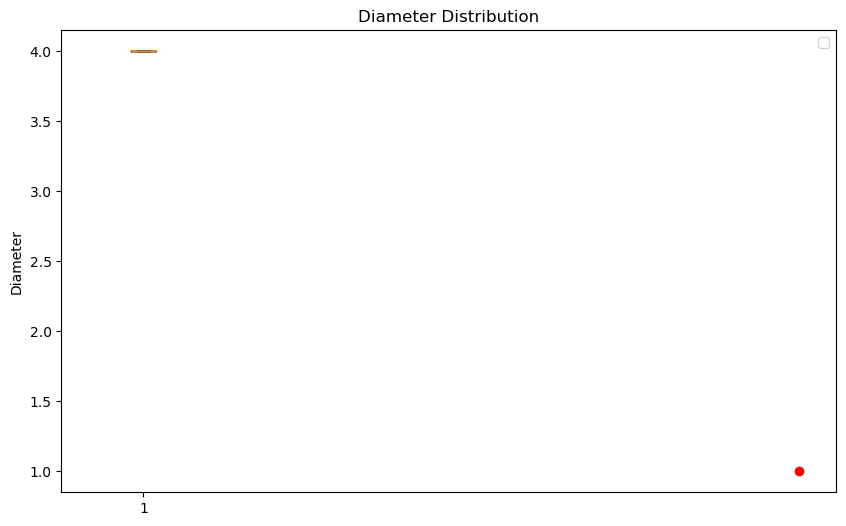

Transitivity Coefficient of G0:  0.26305148321472194


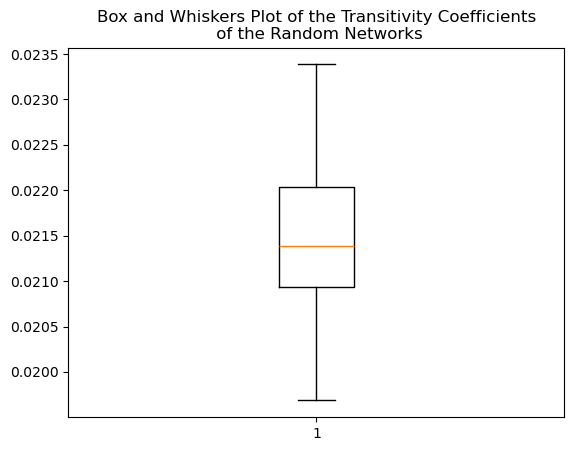

In [33]:
# Do not modify
print(">>Part 3.6 results<<")
diameters, aspls = get_diameters_and_aspls(R_graphs)
plot_diameters(G_0, diameters)
plot_aspls(G_0, aspls)

### 3.7

In [34]:
def diameter_ttest(G: nx.Graph, diameters: List) -> scipy.stats.ttest_ind:
    """
    Inputs:
        G: NetworkX graph object
        diameters: list of diameters
    
    Returns:
         ttest: TtestResult object
    
    """
    
    # This is a placeholder
    
    diameter_G = nx.diameter(G)
    
    ttest = scipy.stats.ttest_ind([diameter_G], diameters)
    return ttest

In [35]:
def aspls_ttest(G: nx.Graph, aspls: List) -> scipy.stats.ttest_ind:
    """
    Inputs:
        G: NetworkX graph object
        aspls: list of aspls
    
    Returns:
        ttest: TtestResult object
    
    """
    
    aspl_G = nx.average_shortest_path_length(G)
     
    ttest = scipy.stats.ttest_ind([aspl_G], aspls)
    
    return ttest

In [36]:
print(">>Part 3.7 results<<")
ttest_diameter = diameter_ttest(G_0, diameters)
ttest_aspls = aspls_ttest(G_0, aspls)
print(ttest_diameter,"\n", ttest_aspls)

>>Part 3.7 results<<


C:\Users\zhaoj\anaconda3\Lib\site-packages\scipy\stats\_axis_nan_policy.py:523: RuntimeWarning: Precision loss occurred in moment calculation due to catastrophic cancellation. This occurs when the data are nearly identical. Results may be unreliable.
  res = hypotest_fun_out(*samples, **kwds)


TtestResult(statistic=inf, pvalue=0.0, df=99.0) 
 TtestResult(statistic=-39.03384866368316, pvalue=6.227923720854006e-62, df=99.0)


Are the values statistically different? Are they within the same order of magnitude?


The p value is less than 0.05, so these values are statistically different. By comparing the average values of the diameters and ASPLs of the random graphs, these are less than 10, these are within in the same order of magnitude.

### Small World Property 
### 3.8
Based on your findings in 3.1-3.7, can you conclude that G0 is a small-world network? Explain which metrics you used and how they support your conclusion. 


By comparing the clustering coefficients of G0 and the random graph, G0 has a significantly higher clustering coefficent than the random graph and ASPL are within the same order of magnitude, so it can be concluded that G0 is a small-world network

## Part 4 - Motifs 

### 4.1

In [37]:
def get_LCC(G: nx.Graph) -> nx.Graph:
    """
    Inputs:
        G: NetworkX graph object
    
    Returns:
        lcc: Largest Connected Component (Directed) of G
    
    """
    #lcc = nx.Graph()
    largest_scc = max(nx.strongly_connected_components(G), key=len, default=set())
    
    lcc = G.subgraph(largest_scc).copy()
    return lcc

In [38]:
def get_motif_59(G: nx.Graph) -> (set, set):
    """
    Inputs:
        G: NetworkX graph object
    
    Returns:
        type_5_motif: set of type 5 motifs
        type_9_motif: set of type  motifs
    
    """  
    type_5_motif = set()
    type_9_motif = set()
    
    
    for node in G.nodes():
        successors = list(G.successors(node))
        for i in range(len(successors)):
            for j in range(i + 1, len(successors)):
                
                if G.has_edge(successors[i], successors[j]):
                    type_5_motif.add((node, successors[i], successors[j]))
                
                if G.has_edge(successors[j], node):
                    type_9_motif.add((node, successors[i], successors[j]))   
    
    return type_5_motif, type_9_motif

In [39]:
# Number of motifs in empirical networks
def get_emperical_motifs(get_motif_59: Callable,
                         lcc: nx.Graph) -> (int, int):
    """
    Inputs:
        get_motif_59: function you already implemented
        lcc: NetworkX graph object
    
    Returns:
        type_5_motif: int - number of type 5 motifs
        type_9_motif: int - number of type 9 motifs
    
    """
    
    type_5_motifs, type_9_motifs = get_motif_59(lcc)
    type_5_motif = len(type_5_motifs)
    type_9_motif = len(type_9_motifs)
    
    return type_5_motif, type_9_motif


# Number of motifs in random networks
def get_random_motifs(get_motif_59: Callable,
                      lcc: nx.Graph) -> (List, List):
    """
    Inputs:
        get_motif_59: function you already implemented
        lcc: NetworkX graph object
    
    Returns:
        type_5_motifs: list - the list is of size N, where N is the number of 
                       randomly generated graphs. The elements are the number 
                       of type 5 motifs for the N generated random graphs.
        type_9_motifs: list - same as above for type 9 motifs
    
    """
    
    num_5_motifs, num_9_motifs = [], []  
    
    num_nodes = lcc.number_of_nodes()
    in_degrees = [d for n,d in lcc.in_degree()]
    out_degrees = [d for n,d in lcc.out_degree()]
    
    for i in range(10):
        
        random_graph = nx.directed_configuration_model(in_degrees, out_degrees)
        random_graph = nx.DiGraph(random_graph)
        random_graph.remove_edges_from(nx.selfloop_edges(random_graph))
        #random_graph = nx.DiGraph(random_graph)
        type_5, type_9 = get_motif_59(random_graph)
        
        num_5_motifs.append(len(type_5))
        num_9_motifs.append(len(type_9))
        
    return num_5_motifs, num_9_motifs 

In [40]:
def plot_5_motifs(num_5_motifs: List, num_5_motif: List):
    """
    Inputs:
        num_5_motifs:
        num_5_motif:
    
    Returns:
        Nothing, but draws the visualizations of the graphs.
    
    """
    """
    plt.figure(figsize=(10, 6))
    sns.boxplot(data=num_5_motifs)
    plt.axhline(y=num_5_motif, color='red', linestyle='dashed', linewidth=2, label='Empirical Network')
    plt.ylabel('Number of Type 5 Motifs (Triangles)')
    plt.title('Distribution of Type 5 Motifs')
    plt.legend()
    plt.show()
    """
    data = num_5_motifs + [num_5_motif]
    labels = ['Random'] * len(num_5_motifs) + ['Empirical']
    plt.boxplot([num_5_motifs, [num_5_motif]], labels=['Random', 'Empirical'])
    plt.title('Comparison of Type-5 Motifs')
    plt.ylabel('Count')
    plt.show()

In [41]:
def plot_9_motifs(num_9_motifs: List, num_9_motif: List):
    """
    Inputs:
        num_9_motifs:
        num_9_motif:
    
    Returns:
        Nothing, but draws the visualizations of the graphs.
    
    """
    """
    plt.figure(figsize=(10, 6))
    sns.boxplot(data=num_9_motifs)
    plt.axhline(y=num_9_motif, color='red', linestyle='dashed', linewidth=2, label='Empirical Network')
    plt.ylabel('Number of Type 9 Motifs (4-Cliques)')
    plt.title('Distribution of Type 9 Motifs in Random Graphs vs. Empirical Network')
    plt.legend()
    plt.show()
    """
    data = num_9_motifs + [num_9_motif]
    labels = ['Random'] * len(num_9_motifs) + ['Empirical']
    plt.boxplot([num_9_motifs, [num_9_motif]], labels=['Random', 'Empirical'])
    plt.title('Comparison of Type-9 Motifs')
    plt.ylabel('Count')
    plt.show()
    


>>Part 4.1 results<<


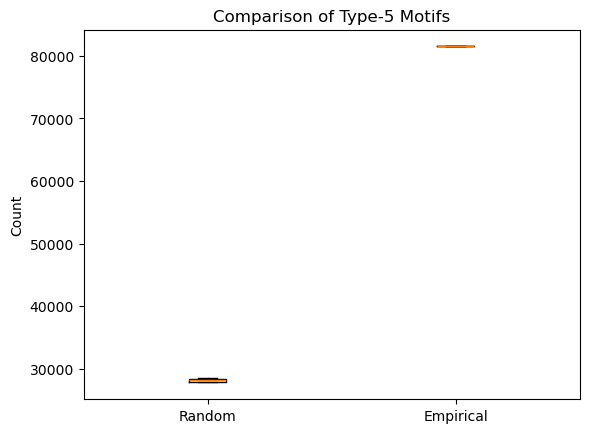

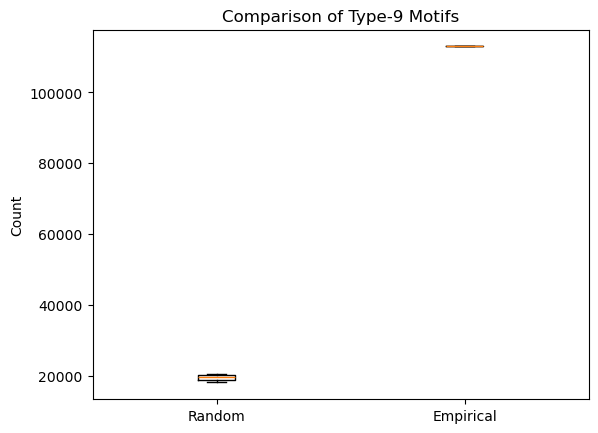

In [42]:
# do not modify
print(">>Part 4.1 results<<")
lcc = get_LCC(G)
num_5_motif, num_9_motif = get_emperical_motifs(get_motif_59, lcc)
num_5_motifs, num_9_motifs = get_random_motifs(get_motif_59, lcc)
plot_5_motifs(num_5_motifs, num_5_motif)
plot_9_motifs(num_9_motifs, num_9_motif)

In [43]:
def motif5_ttest(num_5_motifs: List, num_5_motif: List):
    """
    Inputs:
        num_5_motifs:
        num_5_motif:
    
    Returns:
        ttest: TtestResult object
    
    """
    
    # This is a placeholder
    ttest = scipy.stats.ttest_1samp(num_5_motifs, num_5_motif)
    
    return ttest


In [44]:
def motif9_ttest(num_9_motifs: List, num_9_motif: List):
    """
    Inputs:
        num_9_motifs:
        num_9_motif:
    
    
    Returns:
        ttest: TtestResult object
    
    """
    ttest=scipy.stats.ttest_1samp(num_9_motifs, num_9_motif)
    
    return ttest


In [45]:
print(">>Part 4.2 results<<")

motif5_tstat = motif5_ttest(num_5_motifs, num_5_motif)
motif9_tstat = motif9_ttest(num_9_motifs, num_9_motif)

print(motif5_tstat, motif9_tstat)

>>Part 4.2 results<<
TtestResult(statistic=-682.7670511399095, pvalue=1.5790051173973095e-22, df=9) TtestResult(statistic=-314.4680520288518, pvalue=1.6924676282397708e-19, df=9)


Which of the previous triplet types are statistically more common (or less common) in the network of the LCC compared to what we would expense based on chance?


Based on the t-statistic and p-value, both type 5 motifs and type 9 motifs have extremely negative t-statistic and extremely small p-value, therefore, these are both statistically less common. 

## Part 5 - Transitivity and the Average Clustering Coefficient

Transitivity = 3 x number of triangles / number of connected triples. Therefore, A and B form a triangle with any other node. Each of the 
𝑛 - 2 other nodes creates one triangle with A and B.Thus, the number of triangles is n-2. The number of connected triples is triple n divided by 6 for n is very large. The transitivity equal to 3x(n-2) / ((n^3)/6) Therefore, the transitivity is about to be 0, when number of connected triples is very large.

Average Clustering Coefficient is the average of the local clustering coefficients of all nodes in the network. The local clustering coefficient is 2 x number of triangles connected to i divided by degress of i x (degree of i-1). As local clustering coefficients for A and B are equal to 2 x (n-2)/((n-1)x(n-2)) = 2/(n-1) which is about to be 0 when n is very large. The local clustering coefficient for other nodes is 1, as the degree of any other node is 2. Therefore, for large n, the average clustering coefficient is about to be 1.

In [46]:
def calculate_metrics(n):
    G = nx.Graph()
    nodes = range(n)
    
    G.add_nodes_from(nodes)
    
    for i in nodes:
        if i != 0:
            G.add_edge(0, i)
        if i != 1:
            G.add_edge(1, i)
    G.add_edge(0, 1)
    
    transitivity = nx.transitivity(G)
    avg_clustering = nx.average_clustering(G)
    
    return transitivity, avg_clustering


In [47]:
n = 1000
transitivity, avg_clustering = calculate_metrics(n)
transitivity, avg_clustering

(0.003, 0.9980040040040039)